<a href="https://colab.research.google.com/github/seo-jeong-bang/like_code/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91_%EB%B6%84%EC%84%9D_%EB%B0%8F_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline



pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn")

In [2]:
#데이터 살펴보기
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.corr()["Outcome"].sort_values()

#글루코스와 당뇨가 가장 연관도가 높다는 것을 알 수 있다.

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

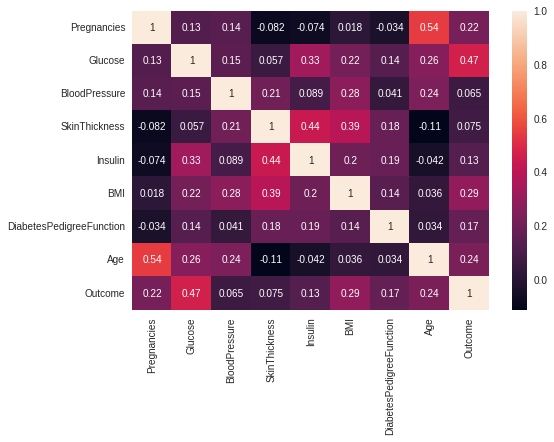

In [10]:
sns.heatmap(df.corr(), annot = True)
plt.show()

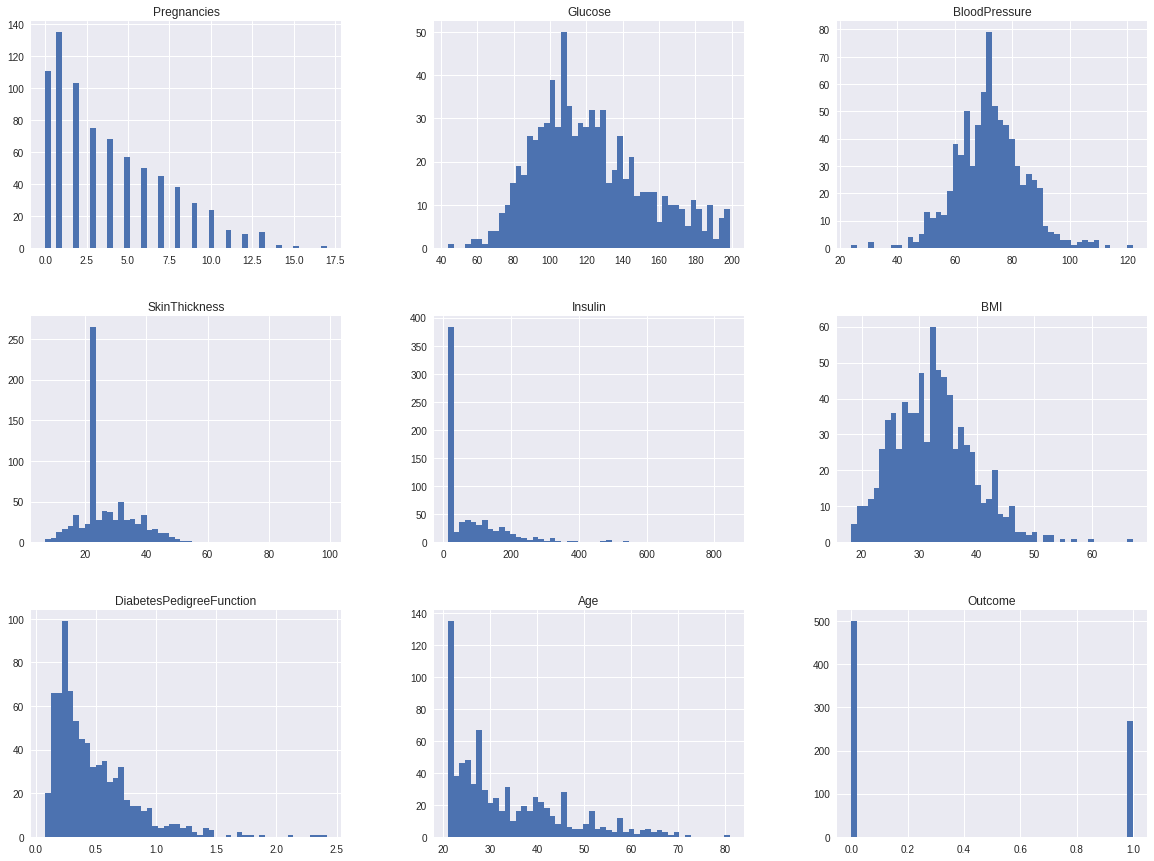

In [51]:
df.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
#막대그래프를 살펴보니 0에서 시작하는 데이터들이 많아서 이 데이터를 개수를 알아보았다.
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    print(f" {col} 의 0 개수는: {df[col].value_counts()[0]}")

 Glucose 의 0 개수는: 5
 BloodPressure 의 0 개수는: 35
 SkinThickness 의 0 개수는: 227
 Insulin 의 0 개수는: 374
 BMI 의 0 개수는: 11


In [48]:
#데이터 값이 0인 데이터를 중앙값으로 대체하였다.
for col in cols:
    col_median =df[col].median()
    df.loc[df[col] == 0, col] = col_median

In [49]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
#fig, ax = plt.subplots (3,3, figsize=(20,15))
#for i, column in enumerate (df.columns):
    #sns.boxplot(data = df, x = column, ax=ax[(i//3),i-(i//3)*3])


In [16]:
#테스트 세트 만들기

x= df.drop(columns=['Outcome'],axis=1)
y=df['Outcome']

In [17]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

In [20]:
standarized_data = scaler.transform(x)

In [21]:
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
x=standarized_data
y=df['Outcome']

In [23]:
print(x)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
'''from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)'''

In [ ]:
'''from sklearn.metrics import mean_squared_error
x_predictions = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train,x_predictions)
lin_rmse =  np.sqrt(lin_mse)
lin_rmse'''


In [25]:
###랜덤 포레스트
###로지스틱
###결정트리
###svc
###sgd classifier

In [26]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix,\
roc_curve
from sklearn.model_selection import cross_val_predict



log_reg_clf=LogisticRegression(random_state=42 , max_iter=500)
log_reg_pred = cross_val_predict(log_reg_clf, x_train, y_train, cv = 5)


In [63]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 5, label= label)
    plt.plot([0, 1], [0, 1], "r--")
    plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15 )
    plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15 )
    plt.title("ROC Curve", fontname = "monospace", fontsize = 17)
    plt.axis([0, 1, 0, 1])
    plt.show()

In [28]:
models, auc_scores = [], []

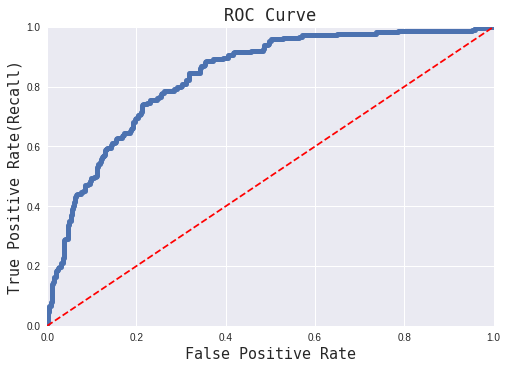

In [29]:
log_reg_scores = cross_val_predict(log_reg_clf, x_train, y_train, cv = 3, method = "decision_function")
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_train, log_reg_scores)
plot_roc_curve(log_reg_fpr, log_reg_tpr)


In [30]:
log_reg_auc = roc_auc_score(y_train, log_reg_scores)
log_reg_auc

0.8354231791413484

In [31]:
log_reg_param_grid = [
    {
        "C": [0.25, 0.5, 1, 2,3]
    }
]

In [34]:
from sklearn.model_selection import GridSearchCV
log_reg_grid_search = GridSearchCV(log_reg_clf, log_reg_param_grid,
                                   cv = 3, scoring = "roc_auc",
                                   return_train_score = True)
log_reg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 3]}], return_train_score=True,
             scoring='roc_auc')

In [52]:
from sklearn.model_selection import GridSearchCV
log_reg_grid_search = GridSearchCV(log_reg_clf, log_reg_param_grid,
                                   cv = 3, scoring = "accuracy",
                                   return_train_score = True)
log_reg_grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=42),
             param_grid=[{'C': [0.25, 0.5, 1, 2, 3]}], return_train_score=True,
             scoring='accuracy')

In [53]:
log_reg_grid_search.best_estimator_

LogisticRegression(C=3, max_iter=500, random_state=42)

In [54]:
log_reg_grid_search.best_score_

0.7703172325840906

In [37]:
#svc
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train,y_train)


SVC()

In [38]:
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train,y_train)


SVC(random_state=42)

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_clf, x_train, y_train, cv = 5, scoring='accuracy')

array([0.76422764, 0.80487805, 0.73170732, 0.76422764, 0.76229508])

In [55]:
#cross_val_predict(svm_clf, x_train, y_train, cv = 5,method = "decision_function)

SyntaxError: ignored

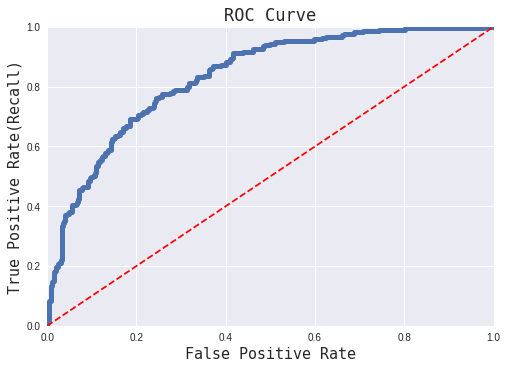

In [42]:
svm_clf_scores = cross_val_predict(svm_clf, x_train, y_train, cv = 5, method = "decision_function")
svm_fpr, svm_tpr, _ = roc_curve(y_train, svm_clf_scores)
plot_roc_curve(svm_fpr, svm_tpr)

In [43]:
svm_param_grid = {
    "kernel": ["rbf", "linear"],
    "C":[1, 5, 10, 20]
}

In [44]:
svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv = 5,
                               scoring = "roc_auc",
                               return_train_score = True)
svm_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 5, 10, 20], 'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='roc_auc')

In [45]:
svm_grid_search.best_estimator_

SVC(C=20, kernel='linear', random_state=42)

In [46]:
svm_grid_search.best_score_

0.8338015428680802

sgd# 새 섹션

In [58]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf_pred = cross_val_predict(sgd_clf, x_train, y_train, cv = 5)

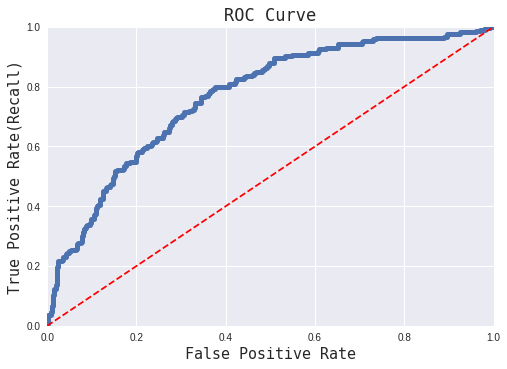

In [60]:
sgd_clf_scores = cross_val_predict(sgd_clf, x_train, y_train, cv = 5, method = "decision_function")
sgd_clf_fpr, sgd_clf_tpr, _ = roc_curve(y_train, sgd_clf_scores)
plot_roc_curve(sgd_clf_fpr, sgd_clf_tpr)

In [61]:
sgd_auc = roc_auc_score(y_train, sgd_clf_scores)
sgd_auc

0.7675529486143795

In [62]:
models.append("SGD Classifier")
auc_scores.append(sgd_auc)

In [ ]:
#의사결정나무


In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
paramaters = {'criterion':['gini','entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split':[1,2,5,10], 
              'max_depth':[None,2], 
              'min_samples_leaf':[10,15,20,30,50], 
              'max_features':[None,'sqrt','log2']}

In [68]:
GSDT = GridSearchCV(dt, paramaters, cv = 10, 
                    scoring = "accuracy", return_train_score = True)
GSDT.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a f

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 15, 20, 30, 50],
                         'min_samples_split': [1, 2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [69]:
print('final params', GSDT.best_params_)
print('best_score', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'best'}
best_score 0.7833685880486515


In [70]:
#의사결정나무

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
paramaters = {'criterion':['gini','entropy'],
              'splitter' : ['best', 'random'],
              'min_samples_split':[1,2,5,10], 
              'max_depth':[None,2], 
              'min_samples_leaf':[10,15,20,30,50], 
              'max_features':[None,'sqrt','log2']}

In [75]:
GSDT = GridSearchCV(dt, paramaters, cv = 10, 
                    scoring = "accuracy", return_train_score = True)
GSDT.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a f

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 15, 20, 30, 50],
                         'min_samples_split': [1, 2, 5, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [76]:
print('final params', GSDT.best_params_)
print('best_score', GSDT.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'splitter': 'best'}
best_score 0.7833685880486515


### 랜덤 포레스트 그리드서치

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [78]:
paramaters = {'criterion':['gini','entropy'],
              'n_estimators':[50, 100, 150],
              'min_samples_split':[2,5,10,15], 
              'max_depth':[None,2], 
              'min_samples_leaf':[1,3,10,15], 
              'max_features':[None,'sqrt','log2']}

scoring = 'accuracy'

In [80]:
GSRF = GridSearchCV(rf, paramaters, cv = 5, scoring = "accuracy")
GSRF.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [81]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
best score 0.7883246701319473


scoring = 'roc_auc'

In [83]:
GSRF = GridSearchCV(rf, paramaters, cv = 5, scoring = "roc_auc")
GSRF.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 10, 15],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc')

In [84]:
print('final params', GSRF.best_params_)
print('best score', GSRF.best_score_)

final params {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 15, 'n_estimators': 100}
best score 0.8473978029339786
